# Analysis on Udemy Web Development Courses

Udemy is a highly popular online learning platform where courses on a great number of subjects such as computer programming or project management courses are made accessible to anyone willing to learn. This a dataset on Udemy web developement courses from 2017, scrapped by user @chasewillden at *[data.world](http://data.world).* 

If I were a data analyst working at an online learning company such as Udemy, what would be some inital observations I find? What is the behavior and characteristics of a business metric that Udemy considers to be important? What are some important metrics that are important for Udemy and can we make any inital predictions about the behaviors of said metrics.

First, we'll load in the data and explore the first few rows to see what we're dealing with.

In [1]:
import pandas as pd
web_dev = pd.read_csv("UdemyWebDevelopment.csv")
not_clean = web_dev
web_dev.head(5)

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,Unnamed: 11,Unnamed: 12,Is Paid,Total,Percent
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z,NaN,NaN,Yes,1067.0,89%
1,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z,NaN,NaN,No,133.0,11%
2,889438,ChatBots: Messenger ChatBot with API.AI and No...,https://www.udemy.com/chatbots/,True,50,2577,529,64,All Levels,4.5 hours,2016-06-30T16:57:08Z,NaN,NaN,NaN,NaN,NaN
3,197836,Projects in HTML5,https://www.udemy.com/projects-in-html5/,True,60,8777,206,75,Intermediate Level,15.5 hours,2014-06-17T05:43:50Z,NaN,NaN,NaN,NaN,NaN
4,505208,Programming Foundations: HTML5 + CSS3 for Entr...,https://www.udemy.com/html-css-more/,True,20,23764,490,58,Beginner Level,5.5 hours,2015-10-17T04:52:25Z,NaN,NaN,NaN,NaN,NaN


# Check for Missing Values

In [2]:
# algorithm for code below

# iterate through each iterable in columns in for loop
# check each iterable column for null values
    # output of web_dev[col].isnull() is True or False
# get the average of null values in each column (12 null values over 1200 total rows)
# format the column name and percentages found

In [3]:
import numpy as np
for col in web_dev.columns:
    pct_missing = np.mean(web_dev[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

id - 0.0%
title - 0.0%
url - 0.0%
isPaid - 0.0%
price - 0.0%
numSubscribers - 0.0%
numReviews - 0.0%
numPublishedLectures - 0.0%
instructionalLevel - 0.0%
contentInfo - 0.0%
publishedTime - 0.0%
Unnamed: 11 - 100.0%
Unnamed: 12 - 100.0%
Is Paid - 99.83333333333333%
Total - 99.83333333333333%
Percent - 99.83333333333333%


In [4]:
# drop columns that aren't meaningful
web_dev = web_dev.drop(["Unnamed: 11","Unnamed: 12","Is Paid","Total","Percent"], axis=1)

# Why is dtype of "price" an object?

First, we have found two columns that contains nothing, as well as 3 additional columns created by the dataset's creator. These columns are of no use to us and will be dropped. After checking the columns for any missing values and for the correct dypes, we have found that there are no missing values, and the `price` and `contentInfo` columns are of the `object` dtype instead of `int` and `float`.

In [5]:
# check contents of columns
print(web_dev.info())
print("\n")

# clean publishedTime column
web_dev.publishedTime = pd.to_datetime(web_dev.publishedTime).dt.date
web_dev = web_dev.rename(columns = {web_dev.columns[10]: "published_date"})

# clean instructionalLevel column
web_dev.instructionalLevel = web_dev.instructionalLevel.str.split().str[0]

# check contents of columns again and the number of rows and columns in the dataset
print(web_dev.info())
print("\n")

web_dev.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1200 non-null   int64 
 1   title                 1200 non-null   object
 2   url                   1200 non-null   object
 3   isPaid                1200 non-null   bool  
 4   price                 1200 non-null   object
 5   numSubscribers        1200 non-null   int64 
 6   numReviews            1200 non-null   int64 
 7   numPublishedLectures  1200 non-null   int64 
 8   instructionalLevel    1200 non-null   object
 9   contentInfo           1200 non-null   object
 10  publishedTime         1200 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 95.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------        

(1200, 11)

# Cleaning the Price Column
Now that the dataset looks a little cleaner, we can see that we are dealing with 11 columns with 1,200 rows in each. 

After checking what's happening with the `price` column, we can see that one of the values is `Free`. We want this column to have a dtype of `int` so that we can potentially perform calculations on this column by simply replacing `Free` with `0`.

In [6]:
# there are 133 instances of the string "Free"
print(web_dev.price.value_counts().head())
print("\n")

# replace string with 0 and change column dtype to int
web_dev.price.replace("Free", 0, inplace=True)
web_dev.price = web_dev.price.astype(int)
print(web_dev.price.value_counts().head(5))
print("\n")

# also check instructionalLevel column 
print(web_dev.instructionalLevel.value_counts())

# create a new column calculating revenue
web_dev["revenue"] = web_dev.price * web_dev.numSubscribers

20      187
Free    133
50      121
200     113
195      72
Name: price, dtype: int64


20     187
0      133
50     121
200    113
195     72
Name: price, dtype: int64


All             659
Beginner        391
Intermediate    135
Expert           15
Name: instructionalLevel, dtype: int64


# Cleaning The `contentInfo` Column
We want this column to be dtype `float` and we can't perform any calculations if there is a substring attached for the unit. We'll change the column name to `contentInfo_hours` and then see what we are dealing with. The interesting thing is that there are some values expressed in minutes instead of hours. We need to first convert the values that are in minutes to be expressed in hours instead so that we don't get confused with `34 mins` for `34 hours` when we remove all of the unit substrings. However, the exact number of minutes a course has is redundant for the analysis, so we will express any course shorter than 1 hour as `0` hours

In [7]:
# adjust the column name to indicate that the float values are in hours
web_dev = web_dev.rename(columns = {web_dev.columns[9]: "contentInfo_hours"})

# this is to help display all the unsummarized rows in .value_counts()
pd.set_option("display.max_rows", None)
web_dev["contentInfo_hours"].value_counts().head(25)

1 hour        136
1.5 hours     124
2 hours       123
3 hours        82
3.5 hours      74
2.5 hours      71
4 hours        56
5 hours        41
4.5 hours      38
5.5 hours      34
6.5 hours      30
6 hours        26
7 hours        25
7.5 hours      20
9 hours        18
8 hours        18
8.5 hours      13
11 hours       11
12.5 hours     11
13 hours       11
10.5 hours     10
10 hours       10
37 mins         9
12 hours        9
9.5 hours       9
Name: contentInfo_hours, dtype: int64

Every class that is under one hour will be denoted as 0 (hours), as a few minutes difference in the length of the classes under and hour will not be significant to the analysis

After renaming the column, we'll first remove any row values with " mins". Since we know that only the row values that are floats instead of string objects are minutes, we'll isolate those row values to convert them to minutes. And then we can clean the rest of the row values because we know that those are hour values.

The significance of knowing the exact number of minutes a course under an hour as is very inconsequential.

In [8]:
# change any row containing substring " mins" to 0 and remove " hour" and " hours" substrings from all rows; change column to float
web_dev["contentInfo_hours"] = web_dev["contentInfo_hours"].apply(lambda x: '0' if ' mins' in x else x)
web_dev["contentInfo_hours"] = web_dev["contentInfo_hours"].replace(to_replace =[' hour$',' hours$'], value = "", regex = True)
web_dev["contentInfo_hours"] = web_dev["contentInfo_hours"].astype(float)
print(web_dev["contentInfo_hours"].value_counts().head(10))
print("\n")

# one final check for cleaning
web_dev.info()

1.0    136
1.5    124
2.0    123
3.0     82
0.0     76
3.5     74
2.5     71
4.0     56
5.0     41
4.5     38
Name: contentInfo_hours, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1200 non-null   int64  
 1   title                 1200 non-null   object 
 2   url                   1200 non-null   object 
 3   isPaid                1200 non-null   bool   
 4   price                 1200 non-null   int32  
 5   numSubscribers        1200 non-null   int64  
 6   numReviews            1200 non-null   int64  
 7   numPublishedLectures  1200 non-null   int64  
 8   instructionalLevel    1200 non-null   object 
 9   contentInfo_hours     1200 non-null   float64
 10  published_date        1200 non-null   object 
 11  revenue               1200 non-null   int64  
dtypes: bool(1), float64(1), 

In [9]:
not_clean.head()

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime,Unnamed: 11,Unnamed: 12,Is Paid,Total,Percent
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z,NaN,NaN,Yes,1067.0,89%
1,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50,47886,285,125,All Levels,12.5 hours,2012-06-18T16:52:34Z,NaN,NaN,No,133.0,11%
2,889438,ChatBots: Messenger ChatBot with API.AI and No...,https://www.udemy.com/chatbots/,True,50,2577,529,64,All Levels,4.5 hours,2016-06-30T16:57:08Z,NaN,NaN,NaN,NaN,NaN
3,197836,Projects in HTML5,https://www.udemy.com/projects-in-html5/,True,60,8777,206,75,Intermediate Level,15.5 hours,2014-06-17T05:43:50Z,NaN,NaN,NaN,NaN,NaN
4,505208,Programming Foundations: HTML5 + CSS3 for Entr...,https://www.udemy.com/html-css-more/,True,20,23764,490,58,Beginner Level,5.5 hours,2015-10-17T04:52:25Z,NaN,NaN,NaN,NaN,NaN


In [10]:
web_dev.head()

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo_hours,published_date,revenue
0,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All,4.0,2013-01-03,3246375
1,19603,Learning Dynamic Website Design - PHP MySQL an...,https://www.udemy.com/learning-dynamic-website...,True,50,47886,285,125,All,12.5,2012-06-18,2394300
2,889438,ChatBots: Messenger ChatBot with API.AI and No...,https://www.udemy.com/chatbots/,True,50,2577,529,64,All,4.5,2016-06-30,128850
3,197836,Projects in HTML5,https://www.udemy.com/projects-in-html5/,True,60,8777,206,75,Intermediate,15.5,2014-06-17,526620
4,505208,Programming Foundations: HTML5 + CSS3 for Entr...,https://www.udemy.com/html-css-more/,True,20,23764,490,58,Beginner,5.5,2015-10-17,475280


In [11]:
web_dev.sort_values(by=['numSubscribers'], inplace=False, ascending=False)['isPaid'].head(100).value_counts()

True     70
False    30
Name: isPaid, dtype: int64

# Regression Analysis of `contentInfo_hours` and `price`
We would think that we can make assumptions that the amount of hours a course has would give us a rough indicator of how it would be priced.

Here we can see that more hours in a course generally means that the course will be higher priced but this only applies for when a course has over 20 hours. Between 0 to 20 hours, a course is priced at whatever price it wants to be set at.

In [12]:
import statsmodels.api as sm

# make new dataframe exclusively for the regression with only the "price" and "contentInfo_hours" columns
regdata = web_dev[["price","contentInfo_hours"]]
display(regdata.describe().round(2))

# the fact that the std for price is $66.08 from the mean, that's pretty crazy

,price,contentInfo_hours
count,1200.00,1200.00
mean,77.03,5.56
std,66.08,7.28
min,0.00,0.00
25%,20.00,1.50
50%,50.00,3.00
75%,115.00,6.50
max,200.00,76.50


In [13]:
# creating a linear regression which predicts price based on course length in hours
y = regdata["price"]
x1 = regdata["contentInfo_hours"]

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     200.3
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           3.62e-42
Time:                        02:06:30   Log-Likelihood:                -6638.5
No. Observations:                1200   AIC:                         1.328e+04
Df Residuals:                    1198   BIC:                         1.329e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                57.9377      2.223     26.066      0.000      53.577      62.299
contentInfo_hours     3.4368      0.243     14.154      0.000       2.960       3.913
==============================================================================
Omnibus:                       96.132   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.606
Skew:                           0.759   Prob(JB):                     2.90e-26
Kurtosis:                       2.784   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this information, we can build our linear regression model as `ŷ = 3.4368x + 57.9377`.

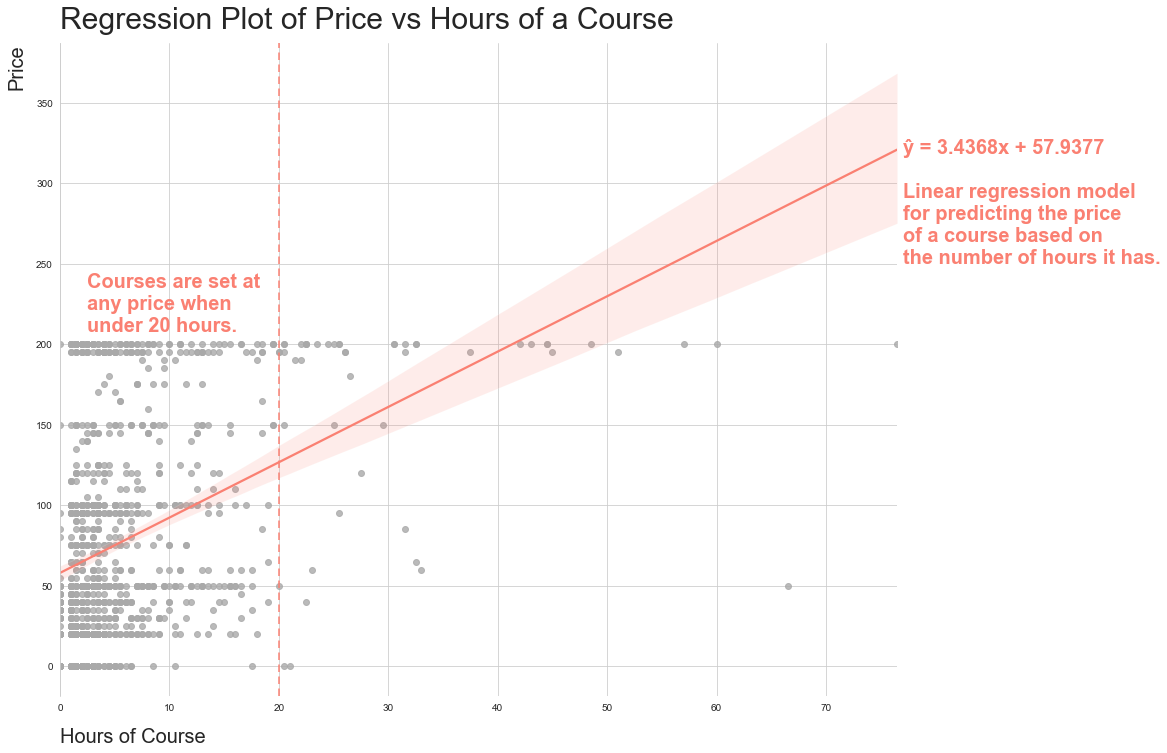

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,12))
sns.regplot(x=web_dev.contentInfo_hours, y=web_dev.price, scatter_kws={"color":"darkgrey"}, line_kws={"color":"salmon"})
plt.axvline(x=20,dashes=(5, 3), c='salmon')
sns.despine(bottom=True)
plt.title("Regression Plot of Price vs Hours of a Course",fontsize=30,pad=15,loc='left')
plt.xlabel("Hours of Course", fontsize=20, loc="left",labelpad=15)
plt.ylabel("Price", fontsize=20, loc="top",labelpad=10)
plt.text(77,250,"ŷ = 3.4368x + 57.9377 \n\nLinear regression model \nfor predicting the price \nof a course based on \nthe number of hours it has.",
         fontsize=20,color='salmon',fontweight='bold')
plt.text(2.5,208,"Courses are set at \nany price when \nunder 20 hours.",
         fontsize=20,color='salmon',fontweight='bold')
plt.show()

# There is a positive trend but the data is too sporatic to be able to use the regression model to make any insights.
After conducting a regression analysis between `contentInfo_hours` and `price`, we see that there is hardly such a relationship. A course that ranges between a length of under 1 hour to 20 hours of lectures can be priced anywhere from free to the max price: \\$200. There are also courses that are under 20 hours can be set at any price point. Some courses that are under 1 hour long can cost over $100! This can be explained that placing large discounts on such high prices can tempt more people to become subscribers, thinking they have snatched a great deal. Discounts can go up to -80% off or free for many days at a time. 

However, when a course has more than 20 hours of lecture, there is some positive trend of a course bring priced more expensive the more hours it has. There is too much variance between all of the plotted points to the regression line to be able to make confidant predictions on the price of a course given the number of hours of lecture it has. This disproves the initial assumption of being about to determine the price of a course by the number of hours it has.

The constant in the regression model implies that even a course at under an hour is priced at at least \\$57.94 but obviously there are free classes and classes under 10 hours priced at $200. The regression model is concluded to be unreliable for practical use but we can see based on the visualization and model that there is a general positive trend between price and hours of a course.

# If not Price and Hours, then what else is correlated?
Below, we observe the correlation coefficients between all of the columns and we have found no notable correlation between columns when comparing correlation coefficients. The `numPublishedLectures` and `contentInfo_hours` columns have a correlation coefficient of `0.86`, but that doesn't mean much to us because you're obviously going to have more hours in your course if you publish more lectures.

In [15]:
print("Correlation Coefficients")
web_dev.corr().round(2)

Correlation Coefficients


,id,isPaid,price,numSubscribers,numReviews,numPublishedLectures,contentInfo_hours,revenue
id,1.00,0.04,0.13,-0.26,-0.09,-0.03,-0.05,-0.09
isPaid,0.04,1.00,0.41,-0.27,-0.07,0.16,0.15,0.12
price,0.13,0.41,1.00,0.01,0.13,0.39,0.38,0.39
numSubscribers,-0.26,-0.27,0.01,1.00,0.64,0.13,0.15,0.54
numReviews,-0.09,-0.07,0.13,0.64,1.00,0.27,0.27,0.78
numPublishedLectures,-0.03,0.16,0.39,0.13,0.27,1.00,0.86,0.34
contentInfo_hours,-0.05,0.15,0.38,0.15,0.27,0.86,1.00,0.34
revenue,-0.09,0.12,0.39,0.54,0.78,0.34,0.34,1.00


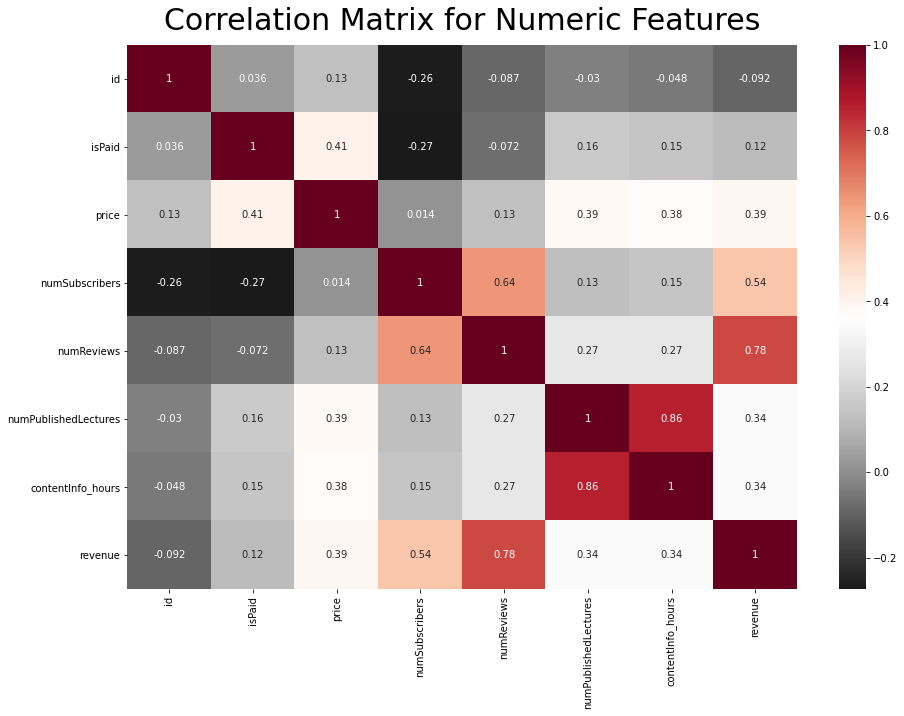

numPublishedLectures  contentInfo_hours       0.859486
contentInfo_hours     numPublishedLectures    0.859486
revenue               numReviews              0.783948
numReviews            revenue                 0.783948
numSubscribers        numReviews              0.643509
numReviews            numSubscribers          0.643509
revenue               numSubscribers          0.537877
numSubscribers        revenue                 0.537877
dtype: float64

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(web_dev.corr(), annot=True, cmap='RdGy_r')
plt.title('Correlation Matrix for Numeric Features',fontsize=30,pad=15)
plt.show()

# unstacking turns the correlation matrix into a series object, sort by correlation coefficients
sorted_pairs = web_dev.corr().unstack().sort_values(ascending=False)

# get sorted pairs that's greater than 0.5 but less than 1 (coefficient of 1 means correlation with itself, which isn't useful information)
high_corr = sorted_pairs[sorted_pairs > 0.5][sorted_pairs < 1]
display(high_corr)

- The more numPublishedLectures, the more contentInfo_hours which is the same thing and doesn't mean much
- High numSubscribers already means high numReviews, also doesn't mean much

# 20% of courses account for 80% of subscribers?
One column we'd want to look deeper into is the `numSubscribers`, as it is the most important business metric currently on hand with the data that measures the performance of a course.

In [17]:
print("Descriptive Statistics")
web_dev.describe().round(2)

Descriptive Statistics


,id,price,numSubscribers,numReviews,numPublishedLectures,contentInfo_hours,revenue
count,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00
mean,706854.25,77.03,6650.48,358.35,52.82,5.56,525703.15
std,328924.40,66.08,14613.65,1574.81,62.81,7.28,1579715.82
min,8324.00,0.00,19.00,0.00,5.00,0.00,0.00
25%,475711.50,20.00,1127.50,25.00,19.00,1.50,29290.00
50%,738456.00,50.00,2416.50,65.00,32.00,3.00,96880.00
75%,975271.50,115.00,6894.75,179.25,63.25,6.50,363065.00
max,1277924.00,200.00,268923.00,27445.00,779.00,76.50,24316800.00


# We can see that there's something going on in the `numSubscribers` column. 
We notice that the both the mean and the top 75 percentile of `numSubscribers` is very far away from the max.

In [18]:
web_dev.numSubscribers.describe()

count      1200.000000
mean       6650.476667
std       14613.648207
min          19.000000
25%        1127.500000
50%        2416.500000
75%        6894.750000
max      268923.000000
Name: numSubscribers, dtype: float64

# Perhaps there are many outliers? 
We will proceed with a boxplot to observe any outliers and a histogram to observe its skewness.

<AxesSubplot:xlabel='numSubscribers', ylabel='Count'>

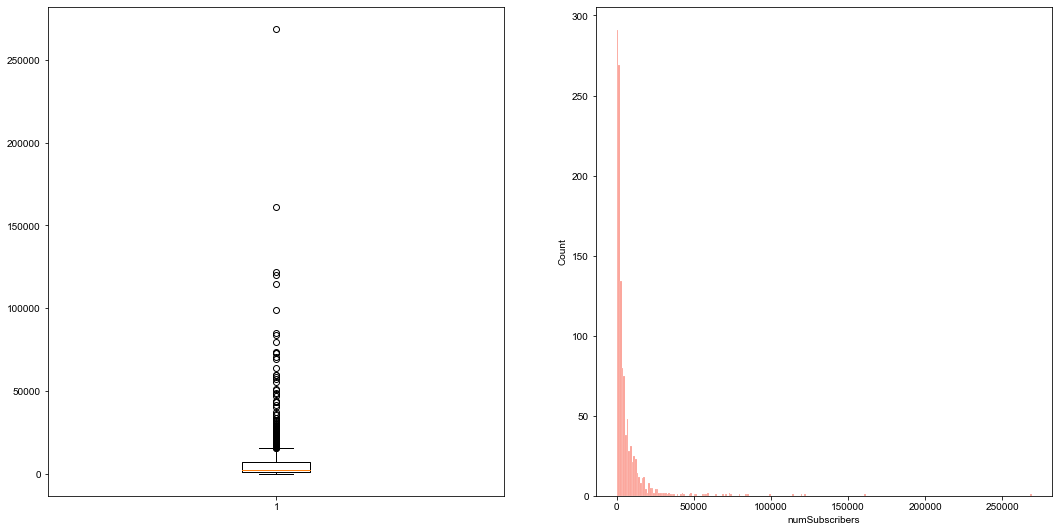

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,9))

# numSubscribers is a good business metric to observe performance of courses
# we see many outliers and lets find out what's going on
ax1.boxplot(web_dev.numSubscribers)

sns.set_style("whitegrid")
df_sorted= web_dev.sort_values('numSubscribers',ascending=False)
sns.histplot(df_sorted.numSubscribers, color='salmon')

After changing perspectives by using a histogram instead of a boxplot, we can see extreme right skewedness; it levels out past the point where courses have more than 25,000 subscribers. This shows that the ratio between the number of courses having under 25,000 subscribers to the number of courses having over 25,000 subscribers is immensely disproportionate.

From the graph, we can estimate that the cutoff point for where the majority of courses lie is at 25,000 subscribers

Findings from the calculations below:
- 96% of all courses had less than 25,000 subscribers and accounted for 62% of all subscribers
- 4% of all courses had more than 25,000 subscribers and accounted for 38% of all subscribers
- only a small percentage of courses are doing most of the heavy lifting for Udemy while the majority of classes are scraping by

Can help to find this:
- what percentage of classes having less than 25,000 subscribers are free?
- what percentage of classes having more than 25,000 subscribers are free?
    - this could explain why so many people would want to choose these classes

In [20]:
# new dataframe for courses having under 25,000 subscribers
under25k = web_dev[web_dev.numSubscribers <= 25000]
over25k = web_dev[web_dev.numSubscribers > 25000]

print("Total Number of Courses")
print(web_dev.shape[0])
print("\n")

print("Count of Courses Having Under 25,000 Subscribers")
print(under25k.shape[0])
print("\n")

print("Count of Courses Having Over 25,000 Subscribers")
print(over25k.shape[0])
print("\n")

print("Percentage of Number of Courses That Have Under 25,000 Subscribers")
per_under25k = round((under25k.shape[0] / web_dev.shape[0])*100, 1)
print(per_under25k)
print("\n")

print("Percentage of Total Courses That Have Over 25,000 Subscribers")
per_over25k = round((over25k.shape[0] / web_dev.shape[0])*100, 1)
print(per_over25k)
print("\n")

print("Total Sum Number of All Subscribers")
print(web_dev.numSubscribers.sum())
print("\n")

print("Sum of numSubscribers for Courses Having Under 25,000 Subscribers")
print(under25k.numSubscribers.sum())
print("\n")

print("Sum of numSubscribers for Courses Having Over 25,000 Subscribers")
print(over25k.numSubscribers.sum())
print("\n")

print("Percentage of Total Students the Top Performing 4% of Classes Holds")
top_percentile = ((over25k.numSubscribers.sum() / web_dev.numSubscribers.sum())*100).round(1)
print(top_percentile)
print("\n")

print("Percentage of Total Students the Bottom Performing 96% of Classes Holds")
bottom_percentile = ((under25k.numSubscribers.sum() / web_dev.numSubscribers.sum())*100).round(1)
print(bottom_percentile)

Total Number of Courses
1200


Count of Courses Having Under 25,000 Subscribers
1147


Count of Courses Having Over 25,000 Subscribers
53


Percentage of Number of Courses That Have Under 25,000 Subscribers
95.6


Percentage of Total Courses That Have Over 25,000 Subscribers
4.4


Total Sum Number of All Subscribers
7980572


Sum of numSubscribers for Courses Having Under 25,000 Subscribers
4984164


Sum of numSubscribers for Courses Having Over 25,000 Subscribers
2996408


Percentage of Total Students the Top Performing 4% of Classes Holds
37.5


Percentage of Total Students the Bottom Performing 96% of Classes Holds
62.5


# Nested Pie Chart

,category,number_of_courses,percentage_of_courses,number_of_subscribers,percentage_of_subscribers
0,Courses Having Under 25K Subs,1147,96,4984164,62
1,Courses Having Over 25K Subs,53,4,2996408,38


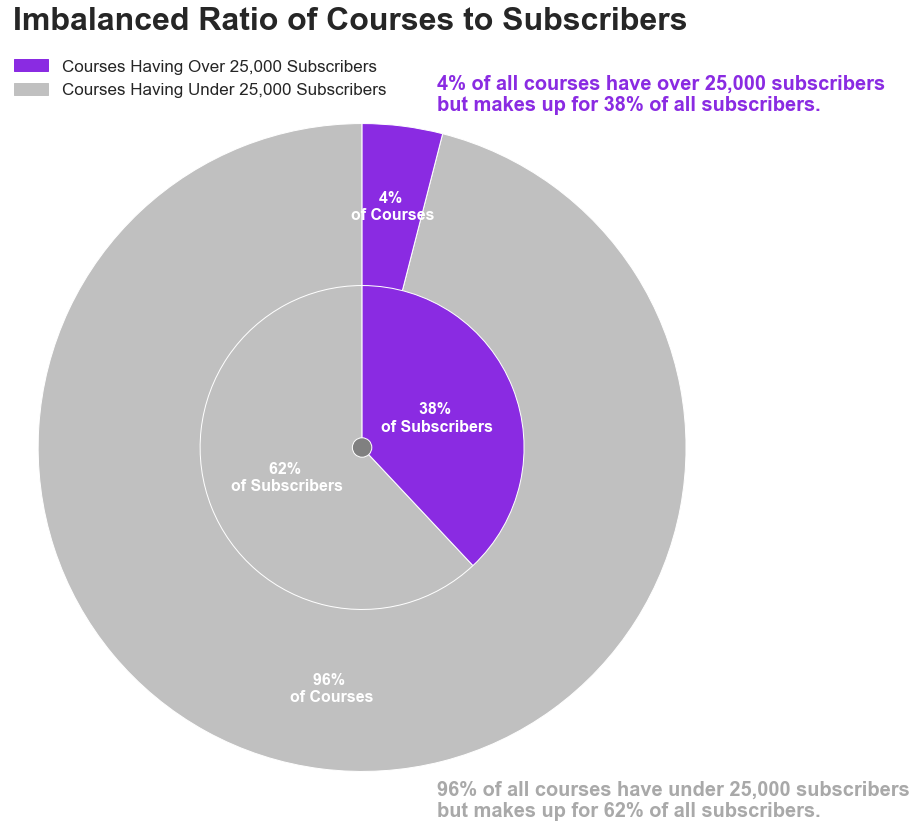

In [36]:
# remove spacing and capitalizing in column names

data = {'category': ['Courses Having Under 25K Subs','Courses Having Over 25K Subs'],
        'number_of_courses': [1147,53],
        'percentage_of_courses': [96,4],
        'number_of_subscribers': [4984164,2996408],
        'percentage_of_subscribers': [62,38]}
stats = pd.DataFrame(data, columns=['category','number_of_courses','percentage_of_courses','number_of_subscribers','percentage_of_subscribers'])
display(stats)

plt.figure(figsize=(10,10))

plt.pie(stats.percentage_of_courses,
        colors=['silver','blueviolet'],startangle=90,
        pctdistance=0.75,radius=1,labeldistance=1.05,autopct='%1.0f%% \nof Courses',
        textprops={'fontsize':16,'color':'white','fontweight':'bold'})

plt.pie(stats.percentage_of_subscribers,
        colors=['silver','blueviolet'],startangle=90,
        pctdistance=0.5,radius=0.5,labeldistance=1.05,autopct='%1.0f%% \nof Subscribers',
        textprops={'fontsize':16,'color':'white','fontweight':'bold'})

centre_circle = plt.Circle((0,0),0.03,fc='grey')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.title("Imbalanced Ratio of Courses to Subscribers",fontweight="heavy",fontsize=32,pad=70,loc='left')

plt.text(0.23,1.04,"4% of all courses have over 25,000 subscribers \nbut makes up for 38% of all subscribers.",
         fontsize=20,color='blueviolet',fontweight="heavy")
plt.text(0.23,-1.14,"96% of all courses have under 25,000 subscribers \nbut makes up for 62% of all subscribers.",
         fontsize=20,color='darkgrey',fontweight="heavy")

import matplotlib.patches as mpatches
patch = mpatches.Patch(color='blueviolet',label='Courses Having Over 25,000 Subscribers')
patch2 = mpatches.Patch(color='silver',label='Courses Having Under 25,000 Subscribers')
plt.legend(handles=[patch,patch2],loc='upper center',bbox_to_anchor=(0.268,1.08),prop={'size': 17},frameon=False)

plt.show()

# Could Free Courses Play a Role?

In [22]:
print("Percent Free Courses Over 25,000 Subscribers")
over25000 = web_dev[web_dev.numSubscribers > 25000]
freeover25k = over25000[over25000.price == 0]
perfreeover25k = freeover25k.shape[0] / over25000.shape[0]
perfreeover25k = round(perfreeover25k, 2) * 100
print(perfreeover25k)
print("\n")

print("Percent Free Courses Under 25,000 Subscribers")
freeunder25k = under25k[under25k.price == 0]
perfreeunder2k = freeunder25k.shape[0] / under25k.shape[0]
perfreeunder2k = round(perfreeunder2k, 3) * 100
print(perfreeunder2k)
print("\n")

print("Number of Free Courses Having Over 25,000 Subscribers (Out of 53 Courses)")
display(web_dev.sort_values(by="numSubscribers",ascending=False).head(53).isPaid.value_counts())
print("\n")

print("Number of Free Courses Having Over 25,000 Subscribers (Out of 53 Courses)")
display(web_dev.sort_values(by="numSubscribers",ascending=False).tail(1147).isPaid.value_counts())

Percent Free Courses Over 25,000 Subscribers
36.0


Percent Free Courses Under 25,000 Subscribers
9.9


Number of Free Courses Having Over 25,000 Subscribers (Out of 53 Courses)


True     34
False    19
Name: isPaid, dtype: int64



Number of Free Courses Having Over 25,000 Subscribers (Out of 53 Courses)


True     1033
False     114
Name: isPaid, dtype: int64

In [23]:
total = [53,1147]
percentages = [36,9.9]
number_free_courses = [19,114]
course_category = ["Courses Having Over 25,000 Subscribers","Courses Having Under 25,000 Subscribers"]
df_free = pd.DataFrame({"course_category":course_category,"number_free_courses":number_free_courses,"total":total,"percentages":percentages})
display(df_free)

# dataframe specifically made for the pie chart below
total = [53,53]
percentages = [64,36]
number_free_courses = [53,19]
course_category = ["Totals","Courses Having Over 25,000 Subscribers"]
df_free_over = pd.DataFrame({"course_category":course_category,"number_free_courses":number_free_courses,"total":total,"percentages":percentages})
display(df_free_over)

# dataframe specifically made for the pie chart below
total = [1147,1147]
percentages = [90.1,9.9]
number_free_courses = [1147,114]
course_category = ["Totals","Courses Having Under 25,000 Subscribers"]
df_free_under = pd.DataFrame({"course_category":course_category,"number_free_courses":number_free_courses,"total":total,"percentages":percentages})
display(df_free_under)

,course_category,number_free_courses,total,percentages
0,"Courses Having Over 25,000 Subscribers",19,53,36.0
1,"Courses Having Under 25,000 Subscribers",114,1147,9.9


,course_category,number_free_courses,total,percentages
0,Totals,53,53,64
1,"Courses Having Over 25,000 Subscribers",19,53,36


,course_category,number_free_courses,total,percentages
0,Totals,1147,1147,90.1
1,"Courses Having Under 25,000 Subscribers",114,1147,9.9


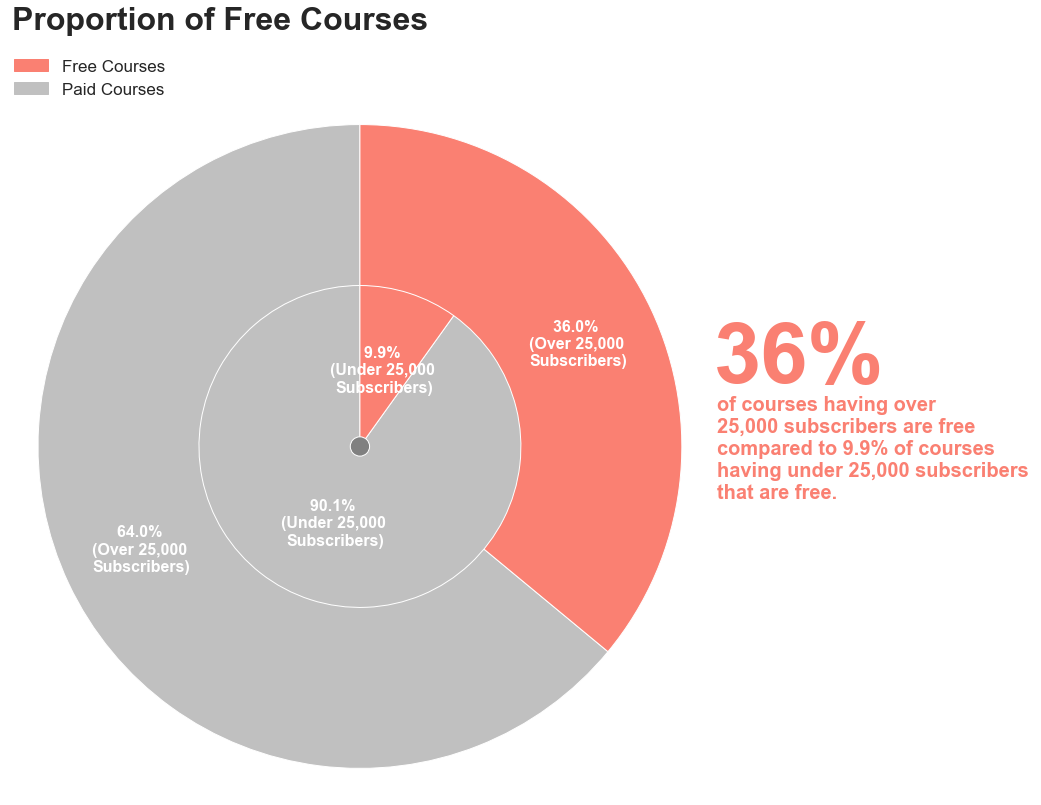

In [39]:
# second pie chart
plt.figure(figsize=(10,10))

plt.pie(df_free_over.percentages,
        colors=['silver','salmon'],startangle=90,
        pctdistance=0.75,radius=1,labeldistance=1.05,autopct='%1.01f%% \n(Over 25,000 \nSubscribers)',
        textprops={'fontsize':16,'color':'white','fontweight':'bold'})

plt.pie(df_free_under.percentages,
        colors=['silver','salmon'],startangle=90,
        pctdistance=0.5,radius=0.5,labeldistance=1.05,autopct='%1.01f%% \n(Under 25,000 \nSubscribers)',
        textprops={'fontsize':16,'color':'white','fontweight':'bold'})

centre_circle = plt.Circle((0,0),0.03,fc='grey')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.title("Proportion of Free Courses",fontweight="heavy",fontsize=32,pad=70,loc='left')

plt.text(1.1,0.2,"36%",
         fontsize=85,color='salmon',fontweight="heavy")
plt.text(1.11,-0.16,"of courses having over \n25,000 subscribers are free \ncompared to 9.9% of courses \nhaving under 25,000 subscribers \nthat are free.",
         fontsize=20,color='salmon',fontweight="heavy")

patch = mpatches.Patch(color='salmon',label='Free Courses')
patch2 = mpatches.Patch(color='silver',label='Paid Courses')
plt.legend(handles=[patch,patch2],loc='upper center',bbox_to_anchor=(0.111,1.08),prop={'size': 17},frameon=False)

plt.show()

# Summary of What the Viz is Supposed to Say

Make a storyboard with the data I got.

1. Is there some kind of conflict or stakes that can be brought up with the data? What's in it for the reader to get invested in this project?